# Image Classification

This code is part of the image classification project initially developed for the "Applied Data Science: Machine Learning" Program from the EPFL Lausanne.
The dataset consists of Swissroads data set which contains several hundreds images of vehicles found in the EPFL - Lausanne area including cars, trucks, vans, bikes, motorcycles and others. 

In [1]:
# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import tensorflow as tf
from tensorflow import keras

# keras imports
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from keras.utils.vis_utils import plot_model
from keras import backend as K 


import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread, imshow, subplots, show

from numpy import expand_dims

import cv2
from PIL import Image

In [2]:
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_CLASSES = 6
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

In [3]:
base_dir = os.getcwd()  # Get the current working directory
data_dir = os.path.join(base_dir, 'swissroads')
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

In [29]:
PATH = 'swissroads/sample/car.jpg'

***
**Utility functions**
***

In [5]:
def plot_augm_images(datagen):
    """
    Plots 8 images generated by an object of the ImageDataGenerator class.
    """
#     datagen.fit(images)
    it = datagen.flow(samples, batch_size=1)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(it.next()[0].astype('int'))
        row.axis('off')
    show()

In [6]:
# Plot images in the form of a grid with 1 row and 5 columns where images are placed in each column to check the data augmentation used.
def plot_raw_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

***
**Exploratory Data Analysis**
***

In [7]:
# apply data augmentation to improve overfitting
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    fill_mode='nearest') # Generator for our training data

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 280 images belonging to 6 classes.


In [9]:
sample_training_images, _ = next(train_data_gen)

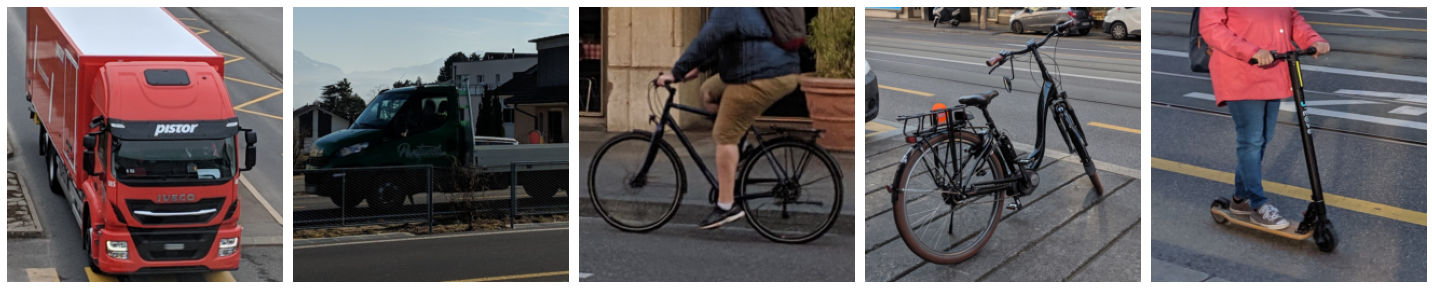

In [10]:
plot_raw_images(sample_training_images[:5])

**Load the model**

In [20]:
model = keras.models.load_model('models/img_cnn/')

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       2

In [22]:
def viz_layer(layer, n_filters= 4): 
    fig = plt.figure(figsize=(20, 20))
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs 
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray') 
        ax.set_title('Output %s' % str(i+1))

In [24]:
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

conv2d (3, 3, 3, 32)
32


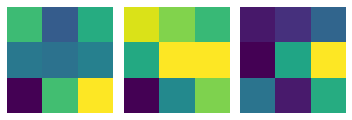

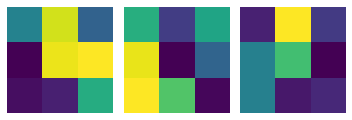

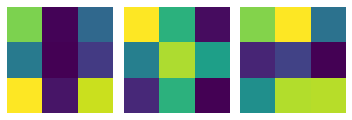

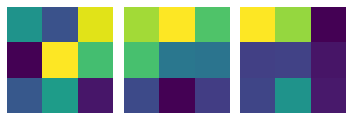

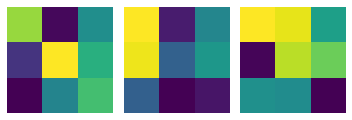

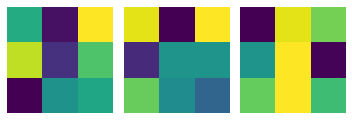

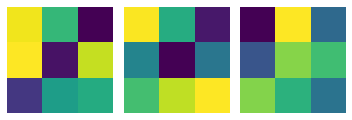

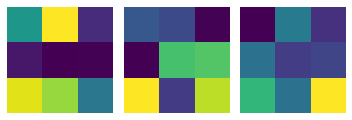

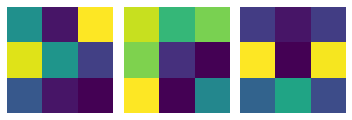

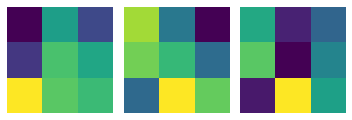

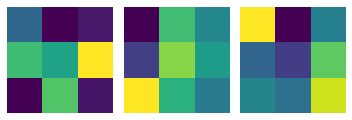

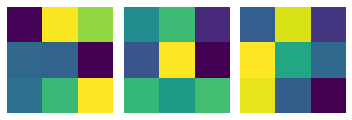

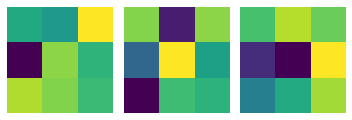

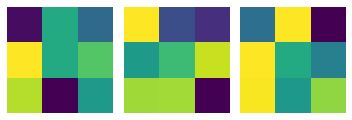

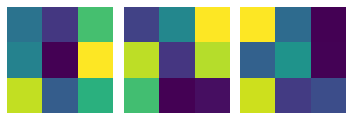

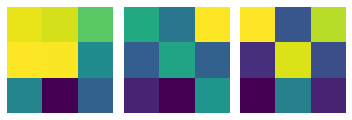

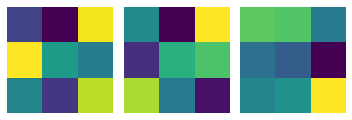

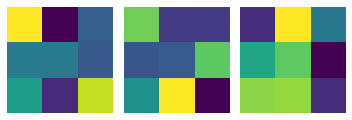

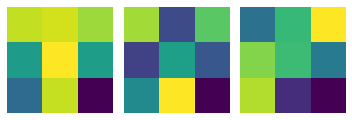

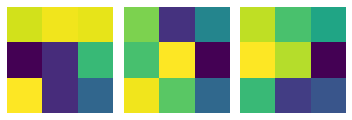

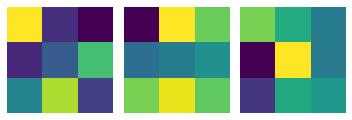

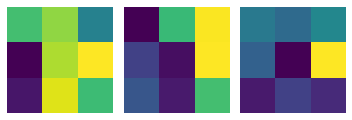

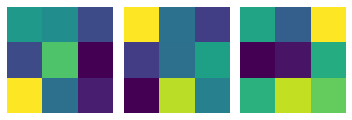

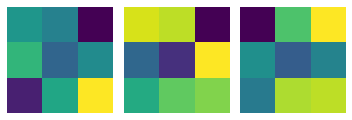

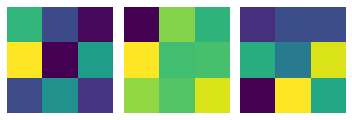

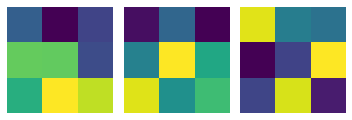

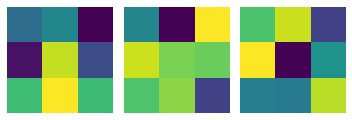

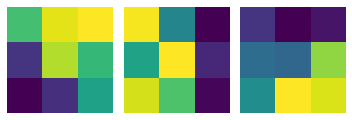

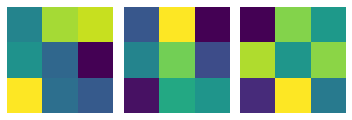

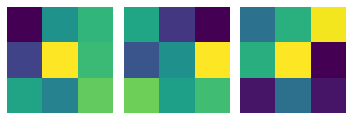

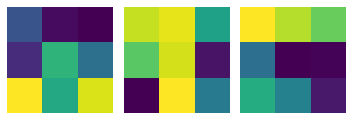

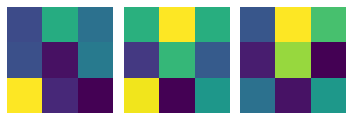

conv2d_1 (3, 3, 32, 64)
64


conv2d_2 (3, 3, 64, 128)
128


conv2d_3 (3, 3, 128, 256)
256


In [25]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias = layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)

conv2d (3, 3, 3, 32)
32


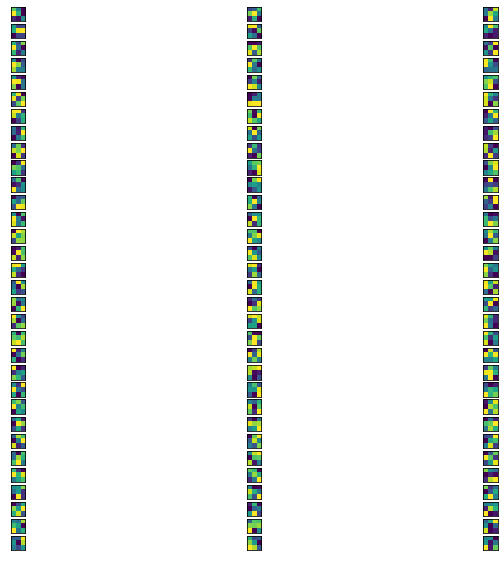

conv2d_1 (3, 3, 32, 64)
64


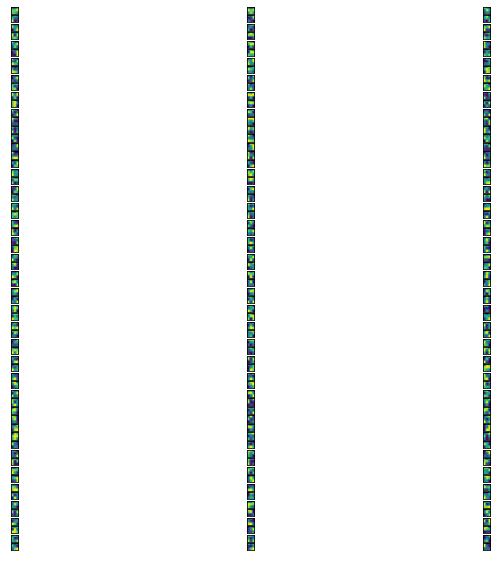

conv2d_2 (3, 3, 64, 128)
128


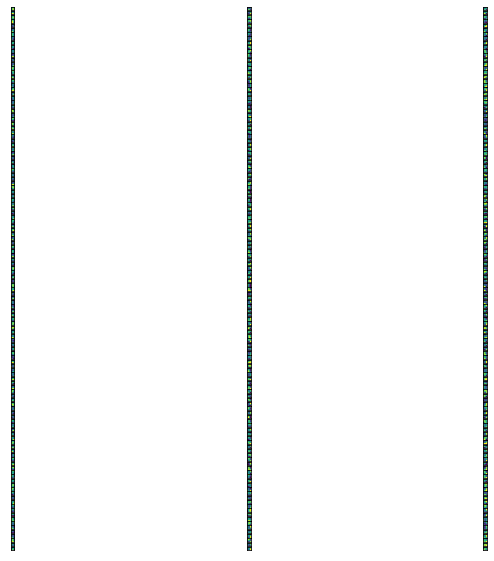

conv2d_3 (3, 3, 128, 256)
256


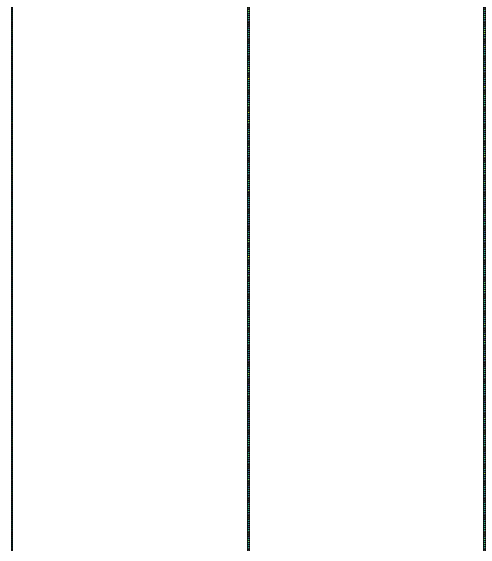

In [30]:
#Visualizing the filters
#plt.figure(figsize=(5,5))
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()
        print(layer.name, weights.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(weights.shape[3])
        filter_cnt = 1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each channel
            for j in range(filters.shape[0]):
                #plt.figure( figsize=(5, 5) )
                #f = plt.figure(figsize=(10,10))
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [30]:
from keras.applications.vgg16 import preprocess_input
# load the image with the required shape
img = load_img(PATH, target_size=(256, 256))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
x = preprocess_input(img)

(1, 128, 128, 32)
(1, 128, 128, 64)


<ipython-input-31-adf865edc852>:40: RuntimeWarning: invalid value encountered in true_divide
  x = x / x.std()


(1, 64, 64, 64)
(1, 64, 64, 128)
(1, 32, 32, 128)
(1, 32, 32, 256)
(1, 16, 16, 256)
(1, 65536)
(1, 512)
(1, 512)
(1, 6)


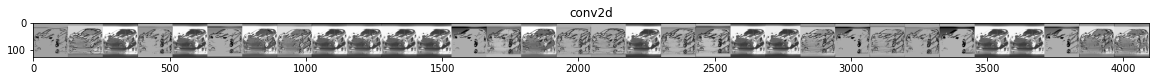

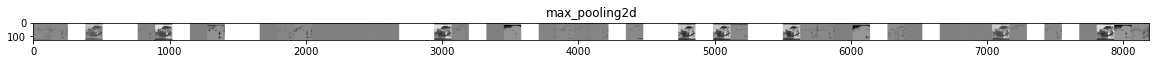

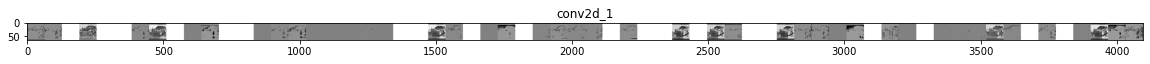

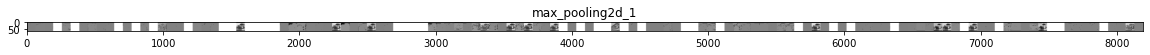

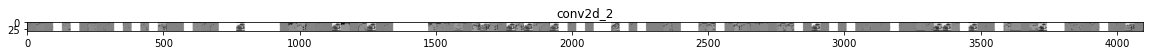

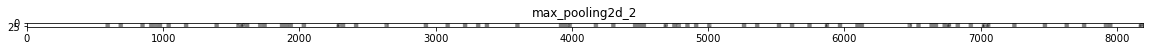

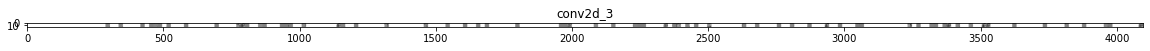

In [31]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
    
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            with np.errstate(divide='ignore'):
                x = x / x.std()
                x[x.std() == 0] = 0
#             x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='gist_gray_r' )

(1, 128, 128, 32)
(1, 128, 128, 64)
(1, 64, 64, 64)


<ipython-input-33-dfe1812c17d3>:18: RuntimeWarning: invalid value encountered in true_divide
  x = x / x.std()


(1, 64, 64, 128)
(1, 32, 32, 128)
(1, 32, 32, 256)
(1, 16, 16, 256)
(1, 65536)
(1, 512)
(1, 512)
(1, 6)


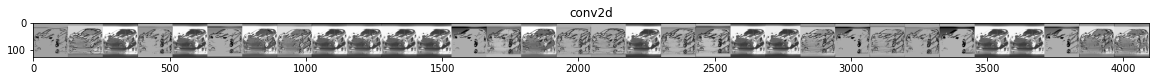

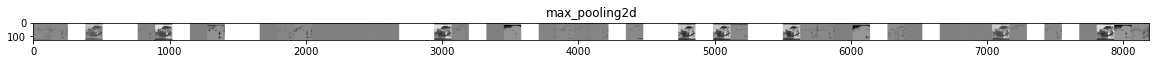

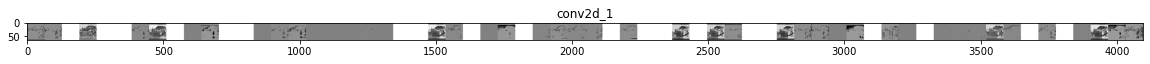

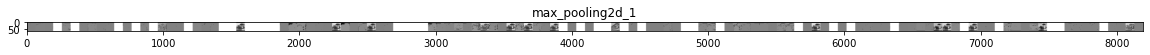

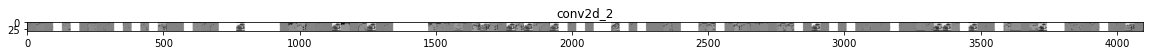

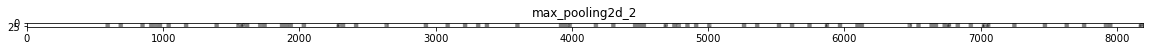

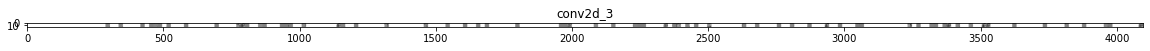

In [33]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            with np.errstate(divide='ignore'):
                x = x / x.std()
                x[x.std() == 0] = 0
#             x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x 

        # Display the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='gist_gray_r' )

In [34]:
import cv2
# Load color image
bgr_img = cv2.imread(PATH)

In [35]:
# Convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

In [36]:
# Normalize, rescale entries to lie in [0,1] 
gray_img = gray_img.astype("float32")/255

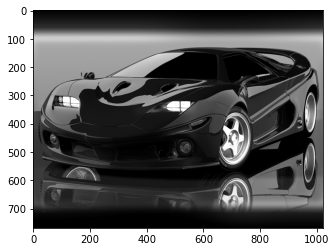

In [37]:
# Plot image
plt.imshow(gray_img, cmap='gray') 
plt.show()

In [39]:
from keras.applications.vgg16 import preprocess_input
# load the image with the required shape
img = load_img(PATH, target_size=(256, 256))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [40]:
# get feature map for first hidden layer
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


feature_maps = visualization_model.predict(img)

(1, 128, 128, 32)
(1, 128, 128, 64)
(1, 64, 64, 64)
(1, 64, 64, 128)
(1, 32, 32, 128)
(1, 32, 32, 256)
(1, 16, 16, 256)


<ipython-input-54-265f713361ab>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(4, 8, ix)


(1, 65536)
(1, 512)
(1, 512)
(1, 6)


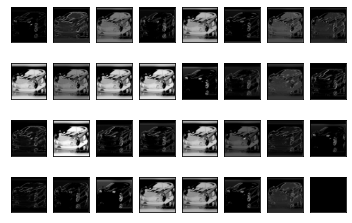

In [54]:
# plot all 32 maps in an 8x4 squares
square = 4
ix = 1
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:

        for i in range(square):
            for j in range(square*2):
                # specify subplot and turn of axis
                ax = plt.subplot(4, 8, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_map[0, :, :, ix-1], cmap='gray')
                if ix < 32: 
                    ix += 1
                else:
                    ix = 32
# show the figure
plt.show()

The result of applying the filters in the first convolutional layers is a lot of versions of the car image with different features highlighted.
For example, some highlight lines, other focus on the background or the foreground.
This is an interesting result and generally matches our expectation. 

In [55]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)


0 conv2d (None, 256, 256, 32)
2 conv2d_1 (None, 128, 128, 64)
4 conv2d_2 (None, 64, 64, 128)
6 conv2d_3 (None, 32, 32, 256)


In [56]:
# get feature map for first hidden layer
successive_outputs = [layer.output for layer in model.layers[2:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


feature_maps = visualization_model.predict(img)

(1, 128, 128, 64)
(1, 64, 64, 64)
(1, 64, 64, 128)
(1, 32, 32, 128)
(1, 32, 32, 256)
(1, 16, 16, 256)
(1, 65536)
(1, 512)
(1, 512)
(1, 6)


<ipython-input-57-31b3fd8b3849>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(square, square*2, ix)


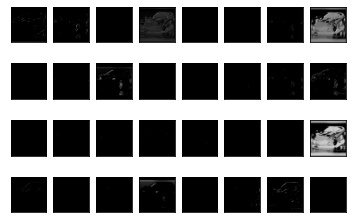

In [57]:
# plot all 32 maps in an 8x4 squares
square = 4
ix = 1
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:


        for _ in range(square):
            for _ in range(square*2):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square*2, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_map[0, :, :, ix-1], cmap='gray')
                if ix < 32: 
                    ix += 1
                else:
                    ix = 32
# show the figure
plt.show()

In [58]:
# get feature map for first hidden layer
successive_outputs = [layer.output for layer in model.layers[3:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


feature_maps = visualization_model.predict(img)

(1, 64, 64, 64)
(1, 64, 64, 128)
(1, 32, 32, 128)


<ipython-input-59-31b3fd8b3849>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(square, square*2, ix)


(1, 32, 32, 256)
(1, 16, 16, 256)
(1, 65536)
(1, 512)
(1, 512)
(1, 6)


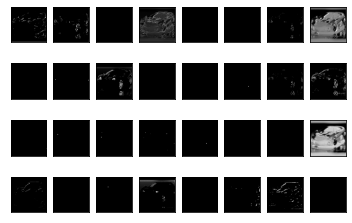

In [59]:
# plot all 32 maps in an 8x4 squares
square = 4
ix = 1
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:


        for _ in range(square):
            for _ in range(square*2):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square*2, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_map[0, :, :, ix-1], cmap='gray')
                if ix < 32: 
                    ix += 1
                else:
                    ix = 32
# show the figure
plt.show()

In [60]:
# get feature map for first hidden layer
successive_outputs = [layer.output for layer in model.layers[4:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


feature_maps = visualization_model.predict(img)

(1, 64, 64, 128)
(1, 32, 32, 128)
(1, 32, 32, 256)
(1, 16, 16, 256)
(1, 65536)
(1, 512)
(1, 512)
(1, 6)


<ipython-input-61-31b3fd8b3849>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(square, square*2, ix)


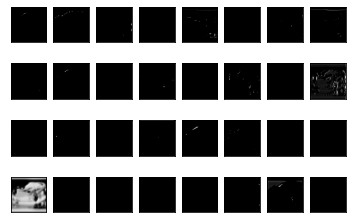

In [61]:
# plot all 32 maps in an 8x4 squares
square = 4
ix = 1
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:


        for _ in range(square):
            for _ in range(square*2):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square*2, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_map[0, :, :, ix-1], cmap='gray')
                if ix < 32: 
                    ix += 1
                else:
                    ix = 32
# show the figure
plt.show()

The feature maps closer to the input of the model capture a lot of fine detail in the image but as we progress deeper into the model, the feature maps show less and less detail.
This pattern was to be expected, as the model abstracts the features from the image into more general concepts that can be used to make a classification. It is at times not clear from the final images that the model saw a car, because we generally lose the ability to interpret the deeper feature maps.
